<a href="https://colab.research.google.com/github/SarahADominguez/STA380-DSSM/blob/main/HW4_2_SarahD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 4 #
## Due: Nov 5th 11:59 PM ##
## Total points: 80 ##

## Name(s) and EID(s):

**Sarah Dominguez, sad3396**

If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment but make sure to include both students' names and UT EIDs.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook and PDF before submitting.

## Q1. (10 points) Binary Classifier

Consider the Covid-test scenario, where we have a test output Y = $\{0,1\}$ and the true value H = $\{0,1\}$. We also know the sensitivity (ie, $\mathbb{P} (Y=1|H=1)$) to be $87.5\%$ and specificity (ie, $\mathbb{P} (Y=0|H=0)$) to be $97.5\%$. However, the prevalence of Covid in the area of interest (ie, the prior) $\mathbb{P} (H=1)$ is not precisely known, and hence the below question:

a. (5 points) Calculate $\mathbb{P} (H=1|Y=1)$ and $\mathbb{P} (H=1|Y=0)$ for different values of prior $\mathbb{P} (H=1)$ = $\{0.01, 0.1, 0.2, 0.5\}$. Plot them w.r.t the different values of prior.

b. (5 points) There is a cheaper test, with same sensitivity (ie, detects Covid +ve at the same rate) but with a reduced specificity of $90\%$(ie, tells healthy people that they are +ve, with a higher rate). Hence plot the same chart as in part a. with the new value of specificity.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

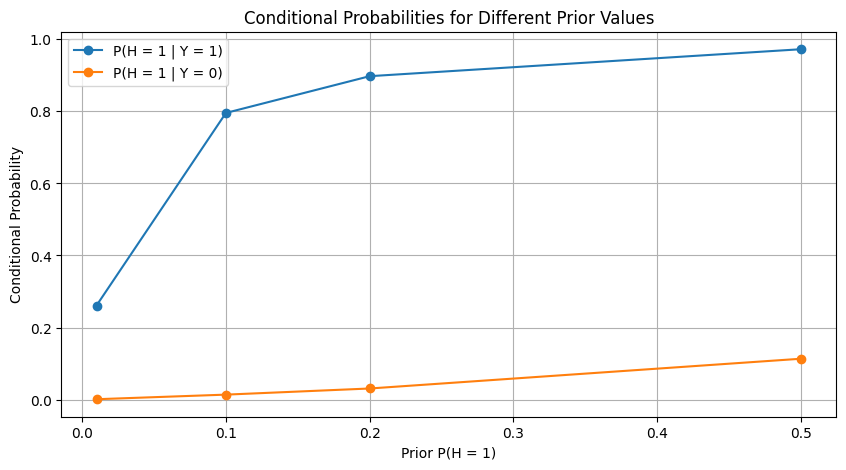

In [2]:
#A: part a, question 1:


# Given values
sensitivity = 0.875
specificity = 0.975
priors = [0.01, 0.1, 0.2, 0.5]

# Initialize lists to store results
p_h_given_y1 = []
p_h_given_y0 = []

# Calculate probabilities for each prior
for prior in priors:
    p_h1 = prior
    p_h0 = 1 - p_h1
    p_y1_given_h1 = sensitivity
    p_y0_given_h0 = specificity
    p_y1_given_h0 = 1 - specificity
    p_y0_given_h1 = 1 - sensitivity

    # Calculate P(Y = 1)
    p_y1 = (p_y1_given_h1 * p_h1) + (p_y1_given_h0 * p_h0)

    # Calculate P(Y = 0)
    p_y0 = (p_y0_given_h1 * p_h1) + (p_y0_given_h0 * p_h0)

    # Calculate P(H = 1 | Y = 1) using Bayes' theorem
    p_h1_given_y1 = (p_y1_given_h1 * p_h1) / p_y1
    p_h_given_y1.append(p_h1_given_y1)

    # Calculate P(H = 1 | Y = 0) using Bayes' theorem
    p_h1_given_y0 = (p_y0_given_h1 * p_h1) / p_y0
    p_h_given_y0.append(p_h1_given_y0)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(priors, p_h_given_y1, label="P(H = 1 | Y = 1)", marker='o')
plt.plot(priors, p_h_given_y0, label="P(H = 1 | Y = 0)", marker='o')
plt.xlabel("Prior P(H = 1)")
plt.ylabel("Conditional Probability")
plt.title("Conditional Probabilities for Different Prior Values")
plt.legend()
plt.grid()
plt.show()


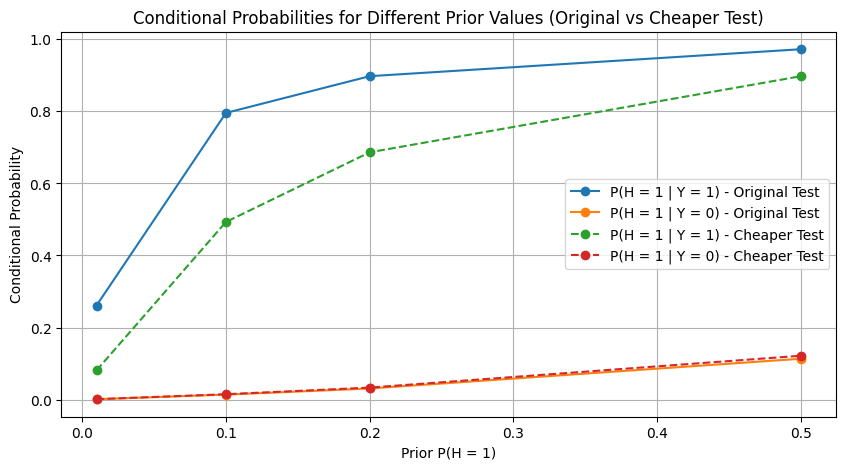

In [3]:
#B: part b, question 1:

# Updated specificity for the cheaper test
new_specificity = 0.90

# Initialize lists to store results for the cheaper test
p_h_given_y1_cheaper = []
p_h_given_y0_cheaper = []

# Calculate probabilities for each prior with the new specificity
for prior in priors:
    p_h1 = prior
    p_h0 = 1 - p_h1
    p_y1_given_h1 = sensitivity
    p_y0_given_h0 = new_specificity
    p_y1_given_h0 = 1 - new_specificity
    p_y0_given_h1 = 1 - sensitivity

    # Calculate P(Y = 1) for the cheaper test
    p_y1_cheaper = (p_y1_given_h1 * p_h1) + (p_y1_given_h0 * p_h0)

    # Calculate P(Y = 0) for the cheaper test
    p_y0_cheaper = (p_y0_given_h1 * p_h1) + (p_y0_given_h0 * p_h0)

    # Calculate P(H = 1 | Y = 1) using Bayes' theorem for the cheaper test
    p_h1_given_y1_cheaper = (p_y1_given_h1 * p_h1) / p_y1_cheaper
    p_h_given_y1_cheaper.append(p_h1_given_y1_cheaper)

    # Calculate P(H = 1 | Y = 0) using Bayes' theorem for the cheaper test
    p_h1_given_y0_cheaper = (p_y0_given_h1 * p_h1) / p_y0_cheaper
    p_h_given_y0_cheaper.append(p_h1_given_y0_cheaper)

# Plotting the results for both tests
plt.figure(figsize=(10, 5))
# Original test
plt.plot(priors, p_h_given_y1, label="P(H = 1 | Y = 1) - Original Test", marker='o')
plt.plot(priors, p_h_given_y0, label="P(H = 1 | Y = 0) - Original Test", marker='o')
# Cheaper test
plt.plot(priors, p_h_given_y1_cheaper, label="P(H = 1 | Y = 1) - Cheaper Test", marker='o', linestyle='--')
plt.plot(priors, p_h_given_y0_cheaper, label="P(H = 1 | Y = 0) - Cheaper Test", marker='o', linestyle='--')

plt.xlabel("Prior P(H = 1)")
plt.ylabel("Conditional Probability")
plt.title("Conditional Probabilities for Different Prior Values (Original vs Cheaper Test)")
plt.legend()
plt.grid()
plt.show()


# Q2. Classification with Skorch (25 points)

In this question we will train and evaluate a simple neural network on a classification dataset using the skorch library. skorch is a scikit-learn compatible neural network library that wraps PyTorch. For more details on how to use the library see [here](https://github.com/skorch-dev/skorch). For this question, we will use a phishing dataset which consists of 11430 URLs with 87 extracted features. The dataset is already preprocessed and provided to you in the file `phishing_dataset.pt`. The dataset is balanced i.e. it contains 50% phishing and 50% legitimate URLs.


In [4]:
!pip install skorch mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 9.3 MB/s eta 0:00:00


In [5]:
import torch
import numpy as np
import pandas as pd
from torch import nn
from skorch import NeuralNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
uploaded = files.upload()

Saving phishing_dataset_final.pt to phishing_dataset_final (1).pt


In [7]:
X_train, y_train, X_train_imbalanced, y_train_imbalanced, X_test, y_test, X_test_imbalanced, y_test_imbalanced = torch.load('phishing_dataset_final.pt')

<ipython-input-7-6c5dc452fbe8>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  X_train, y_train, X_train_imbalanced, y_train_imbalanced, X_test, y_test, X_test_imbalanced, 

## Part 1. (9 points)

In this part we will define our neural network. When building our network we will take as input the following:
1. inp_size: the number of input features
2. hidden_sizes: list of the size of each hidden layer in the network. Note that this does not include the size of the input and output layer. Eg: `[16, 8]` in which case your NN will look like: input_layer -> hidden_layer_1 (size 16) -> hidden_layer_2 (size 8) -> output_layer.
3. num_classes: the number of output classes which is equivalent to the size of the output layer. In our example, we only have 2 classes (phishing, non-phishing).
4. nonlin: the activation function. Eg: `torch.nn.ReLU()`.

The above arguments will be used to initialize our neural network. Notice that we want to be able to initialize an arbitrary size network specified by the hidden_sizes. To do this you must first initialize a `nn.ModuleList()` and append your layer followed by the activation for each specified size. You can refer to [this](https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html) for more help.

You must also define a `forward(X)` function which handles the forward pass of your network. Here `X` is your input and you must return the [softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) output tensor from your network in this function.

In [8]:
class MyModule(nn.Module):
    def __init__(self, inp_size=87, hidden_sizes=[16, 8], num_classes=2, nonlin=nn.ReLU()):
        super().__init__()
        # define your hidden layers (self.hidden) as a nn.ModuleList() and append your nn.Linear layers based on the hidden_sizes
        ##  START CODE  ##
        self.hidden = nn.ModuleList()
        prev_size = inp_size
        for hidden_size in hidden_sizes:
            self.hidden.append(nn.Linear(prev_size, hidden_size))
            prev_size = hidden_size
        self.output_layer = nn.Linear(prev_size, num_classes)
        ##  END CODE  ##

        # define softmax
        ##  START CODE  ## (1 line of code)
        self.softmax = nn.Softmax(dim=1)
        ##  END CODE  ##

# store non-linearity function
#might need this
        self.nonlin = nonlin

    def forward(self, X):
        # calculate the output from your hidden layers
        # Hint: if your hidden layers are in the form of nn.ModuleList(),
        #       you must write a for loop to do a forward pass on all layers in the list
        ##  START CODE  ##
        for layer in self.hidden:
            X = self.nonlin(layer(X))
        ##  END CODE  ##

        # calculate softmax on the output
        ##  START CODE  ## (1 line of code)
        out = self.softmax(self.output_layer(X))
        ##  END CODE  ##
        return out

## Part 2. (5 points)

In this part we will train and evaluate the neural network on our dataset. Use `X_train` and `y_train` tensors to train the model. Use `X_test` and `y_test` tensors to evaluate.  **To get full credit you must obtain an accuracy of 95% or more on the test set.** You must use GridSearchCV from sklearn to search the best hyperparameters. Search over atleast 2 values (can be anything of your choice) of the following hyperparams:
1. Learning rate
2. Number of training epochs
3. hidden_sizes which is the input to your neural network you defined above
4. nonlin which is the activation function input to your neural network you defined above

Finally, use sklearn's ConfusionMatrixDisplay and RocCurveDisplay to caluclate and display the confusion matrix and ROC on the test set for the best model obtained using the grid search. Also use classification_report to calculate and print the precision and recall values of the positive and negative label.

In [9]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, classification_report
import torch.optim as optim

In [10]:
# define a NeuralNetClassifier() with batch size 256, torch.optim.Adam optimizer and torch.nn.CrossEntropyLoss as the criterion
# IMPORTANT: also use iterator_train__shuffle=True to shuffle the training data during the training process
##  START CODE  ##
net = NeuralNetClassifier(
    MyModule,
    max_epochs=10,
    lr=0.01,
    batch_size=256,
    optimizer=optim.Adam,
    criterion=torch.nn.CrossEntropyLoss,
    iterator_train__shuffle=True
)
##  END CODE  ##

# deactivate skorch-internal train-valid split and verbose logging
net.set_params(train_split=False, verbose=0)

# define the parameters you want to search over as a dict
##  START CODE  ##
params = {
    'lr': [0.001, 0.01],
    'max_epochs': [10, 20],
    'module__hidden_sizes': [[16, 8], [32, 16]],
    'module__nonlin': [torch.nn.ReLU(), torch.nn.Tanh()]
}
##  END CODE  ##

# define your GridSearchCV()
# IMPORTANT: use cv=3, scoring='accuracy' (to obtain best model based on accuracy)
# and refit=True (to retrain the model using the best hyperparams for later use i.e. evaluation).
##  START CODE  ## (1 line of code)
gs = GridSearchCV(net, params, cv=3, scoring='accuracy', refit=True)
##  END CODE  ##

In [11]:
# train your model
##  START CODE  ## (1 line of code)
gs.fit(X_train, y_train)
##  END CODE  ##

# print best params
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))

best score: 0.953, best params: {'lr': 0.01, 'max_epochs': 20, 'module__hidden_sizes': [32, 16], 'module__nonlin': ReLU()}


Best Accuracy on Test:  0.9534639608117564
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1433
           1       0.96      0.95      0.95      1425

    accuracy                           0.95      2858
   macro avg       0.95      0.95      0.95      2858
weighted avg       0.95      0.95      0.95      2858



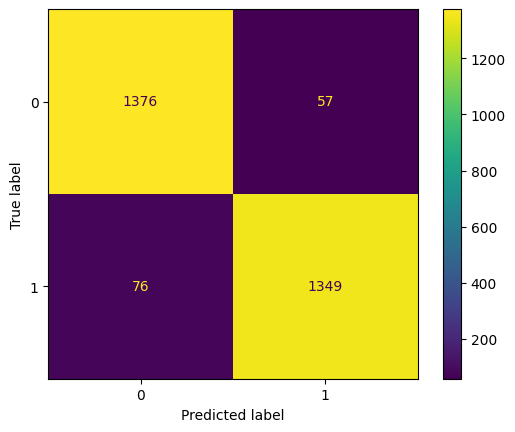

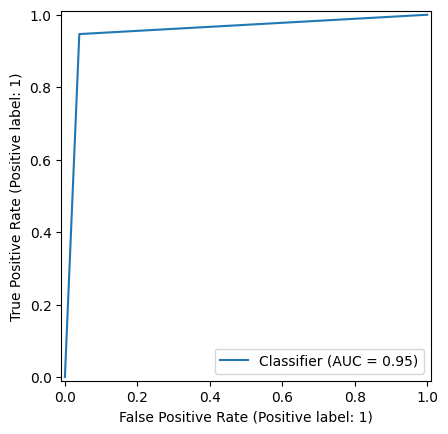

In [12]:
# Get the best model from your GridSearchCV object.
##  START CODE  ## (1 line of code)
net = gs.best_estimator_
##  END CODE  ##

# get predictions on the test data
##  START CODE  ## (1 line of code)
y_pred_test = net.predict(X_test)
##  END CODE  ##

# calculate accuracy and print
print("Best Accuracy on Test: ", accuracy_score(y_test, y_pred_test))

# calculate confusion matrix and use ConfusionMatrixDisplay to display the matrix
##  START CODE  ##
confusion_mat = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
##  END CODE  ##

# use RocCurveDisplay to display the roc curve and AUC
##  START CODE  ## (1 line of code)
RocCurveDisplay.from_predictions(y_test, y_pred_test)
##  END CODE  ##

# print sklearn's classification_report which consists of precision and recall for both labels
##  START CODE  ## (1 line of code)
print(classification_report(y_test, y_pred_test))
##  END CODE  ##

## Part 3. (5 points)

In this part we will deal with a more realistic scenario. In reality most emails we receieve are non-phishing legitimate emails. Hence in a real world dataset, we can expect that there will be way more datapoints with a negative label than positive. Hence the dataset will be imbalanced.

Use `X_train_imbalanced` and `y_train_imbalanced` tensors to train the model. Use `X_test_imbalanced` and `y_test_imbalanced` tensors to evaluate.  **To get full credit you must obtain an accuracy of 95% or more on the imbalanced test set.** You must use GridSearchCV from sklearn to search the best hyperparameters. Search over atleast 2 values (can be anything of your choice) of the following hyperparams:
1. Learning rate
2. Number of training epochs
3. hidden_sizes which is the input to your neural network you defined above
4. nonlin which is the activation function input to your neural network you defined above

Finally, use sklearn's ConfusionMatrixDisplay and RocCurveDisplay to caluclate and display the confusion matrix and ROC on the imbalanced test set for the best model obtained using the grid search. Also use classification_report to calculate and print the precision and recall values of the positive and negative label.

In [13]:
# define a NeuralNetClassifier() with batch size 256, torch.optim.Adam optimizer and torch.nn.CrossEntropyLoss as the criterion
# IMPORTANT: also use iterator_train__shuffle=True to shuffle the training data during the training process
##  START CODE  ##
net_imbalanced = NeuralNetClassifier(
    MyModule,
    max_epochs=10,
    lr=0.01,
    batch_size=256,
    optimizer=optim.Adam,
    criterion=torch.nn.CrossEntropyLoss,
    iterator_train__shuffle=True
)
##  END CODE  ##

# deactivate skorch-internal train-valid split and verbose logging
net_imbalanced.set_params(train_split=False, verbose=0)

# define the parameters you want to search over as a dict
##  START CODE  ##
params = {
    'lr': [0.001, 0.01],
    'max_epochs': [10, 20],
    'module__hidden_sizes': [[16, 8], [32, 16]],
    'module__nonlin': [torch.nn.ReLU(), torch.nn.Tanh()]
}
##  END CODE  ##

# define your GridSearchCV()
# IMPORTANT: use cv=3, scoring='accuracy' (to obtain best model based on accuracy)
# and refit=True (to retrain the model using the best hyperparams for later use i.e. evaluation).
##  START CODE  ## (1 line of code)
gs_imbalanced = GridSearchCV(net_imbalanced, params, cv=3, scoring='accuracy', refit=True)
##  END CODE  ##

In [14]:
# train your model on the imbalanced train dataset
##  START CODE  ## (1 line of code)
gs_imbalanced.fit(X_train_imbalanced, y_train_imbalanced)
##  END CODE  ##

# print best params
print("best score: {:.3f}, best params: {}".format(gs_imbalanced.best_score_, gs_imbalanced.best_params_))

best score: 0.959, best params: {'lr': 0.01, 'max_epochs': 20, 'module__hidden_sizes': [16, 8], 'module__nonlin': ReLU()}


Best Accuracy on Imbalanced Test:  0.9554507337526206
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1433
         1.0       0.93      0.89      0.91       475

    accuracy                           0.96      1908
   macro avg       0.95      0.93      0.94      1908
weighted avg       0.96      0.96      0.96      1908



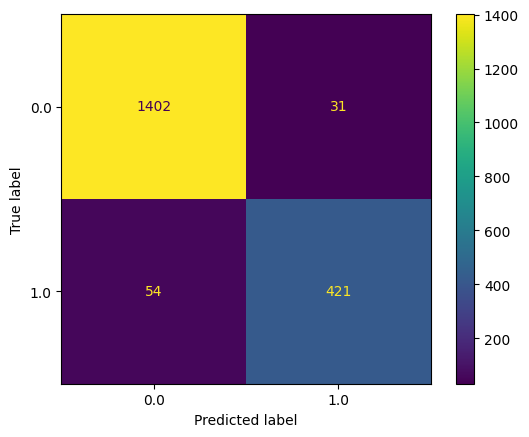

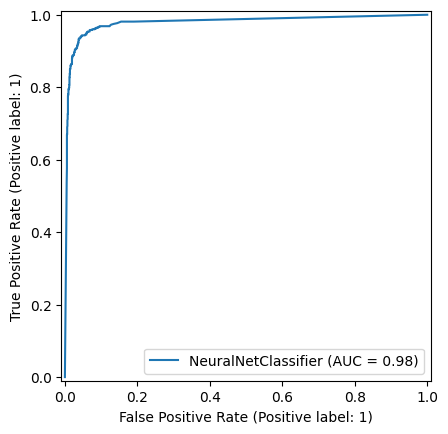

In [15]:
# Get the best model from your GridSearchCV object.
##  START CODE  ## (1 line of code)
net_imbalanced = gs_imbalanced.best_estimator_
##  END CODE  ##

# get predictions on the imbalanced test data
##  START CODE  ## (1 line of code)
y_pred_test = net_imbalanced.predict(X_test_imbalanced)
##  END CODE  ##

# calculate accuracy and print
print("Best Accuracy on Imbalanced Test: ", accuracy_score(y_test_imbalanced, y_pred_test))

# calculate confusion matrix and use ConfusionMatrixDisplay to display the matrix
##  START CODE  ##
confusion_mat = ConfusionMatrixDisplay.from_predictions(y_test_imbalanced, y_pred_test)
##  END CODE  ##

# use RocCurveDisplay to display the roc curve and AUC
##  START CODE  ## (1 line of code)
RocCurveDisplay.from_estimator(net_imbalanced, X_test_imbalanced, y_test_imbalanced)
##  END CODE  ##

# print sklearn's classification_report which consists of precision and recall for both labels
##  START CODE  ## (1 line of code)
print(classification_report(y_test_imbalanced, y_pred_test))
##  END CODE  ##

In [16]:
# do not modify anything here
from sklearn import metrics
%matplotlib inline
import mpld3
mpld3.enable_notebook()

# IMPORTANT: to use this function simply call compare_roc_curves()
def compare_roc_curves():
  y_pred = net.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
  auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
  plt.plot(fpr,tpr,label="Balanced Model, AUC="+str(auc))

  y_pred = net_imbalanced.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
  auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
  plt.plot(fpr,tpr,label="Imbalanced Model, AUC="+str(auc))
  plt.legend()


## Part 4. (6 points)

Briefly answer the following questions (1 paragraph should suffice):

a. How does the performance (wrt the ROC curve) of the model trained on the imbalanced dataset compare to that of the model trained on the balanced dataset? *(Hint: Use compare_roc_curves() function to plot both ROC curves on the same plot and zoom in on the curved part. Think about it indicates about the decision threshold of the 2 models)* (2 points)

b. Is accuracy the best metric to judge a model performance in this case? When dealing with a phishing dataset which set of metric(s) is most important to get a real sense of the model performance? *(Hint: think about which value in your confusion matrix matters the most and a metric related to that value)* (2 points)

c. What are some techniques to help counter label imbalance in your training set? (2 points)

## Answer

a. The model trained on the imbalanced dataset might show a different ROC curve compared to the one trained on balanced data. A model trained on balanced data usually learns to recognize both phishing and non-phishing emails equally well, so its ROC curve may rise more steeply, showing it's better at identifying both classes. On the other hand, the model trained on imbalanced data may favor the majority class (non-phishing) and have a flatter curve at first, indicating it's less sensitive to phishing emails. This difference suggests that the model trained on imbalanced data might need a different decision threshold to perform as well.


b. Accuracy isn’t the best way to measure performance here. In phishing detection, what matters most is that the model can correctly identify phishing emails, even though they are rare. Metrics like precision, recall, and F1-score are more important because they show how well the model detects phishing. Recall, especially, is crucial because it measures how many actual phishing emails were caught by the model, helping ensure fewer phishing emails are missed.


c. To handle label imbalance, you can try several techniques. One option is to oversample the minority class (phishing emails) to give the model more examples of phishing. Another approach is undersampling the majority class (non-phishing) to balance the classes. You can also use class weights in the loss function, which makes the model more sensitive to phishing emails by penalizing it more when it fails to identify them.

# Q3. Logistic Regression and Softmax Classifier (10 points)



## Part 1. (5 points)

We have a dataset $\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_N, y_N) \}$ where $\mathbf{x}_i \in \mathbb{R}^{d}$ and $y_i \in \{1, \ldots, K\}$ for all $i$.  Suppose we have a $K$-way softmax classifier:

\begin{equation}
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(\mathbf{w}_k^{\top} \mathbf{x} + b_k )}{\sum_{j=1}^{K} \exp(\mathbf{w}_j^{\top} \mathbf{x} + b_j ) }
\end{equation}

where $\mathbf{w}_k \in \mathbb{R}^d$ and $b_k \in \mathbb{R}$ are the weight and bias parameters from the weight matrix and bias vector:

\begin{equation}
\mathbf{W} = \begin{pmatrix}
                \mathbf{w}_1^\top \\
                \mathbf{w}_2^\top \\
                \vdots \\
                \mathbf{w}_K^\top
            \end{pmatrix}\\
\mathbf{b} = \begin{pmatrix}
                b_1 \\
                b_2 \\
                \vdots \\
                b_K
            \end{pmatrix}
\end{equation}


Show that when $K=2$, this softmax classifier is equivalent to logistic regression.


## Answer

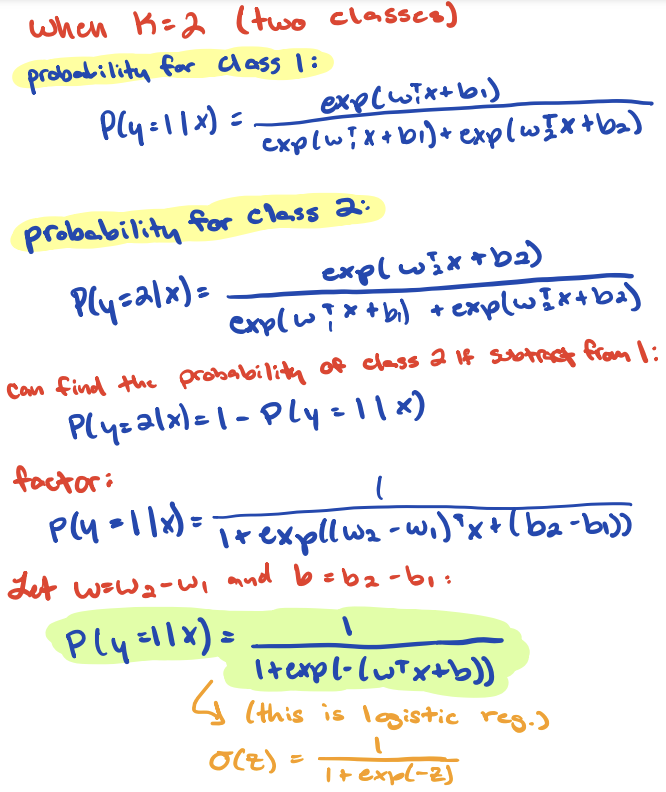

## Part 2. (5 points)

Suppose we slightly tweak the softmax classifier by adding an additional non-negative temperature parameter $T$:

\begin{equation}
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp((\mathbf{w}_k^{\top} \mathbf{x} + b_k ) / T)}{\sum_{j=1}^{K} \exp((\mathbf{w}_j^{\top} \mathbf{x} + b_j ) / T) }
\end{equation}

(a) What will happen to the classifier output when $T \rightarrow \infty$? How about when $T \rightarrow 0$?

(b) How is this parameter useful for our model and how do we choose it?

## Answer

a.)
When
T→∞: As
T becomes very large, the model’s output probabilities for each class become almost equal. This means the model is "less confident" and assigns similar probabilities to all classes, regardless of which class might actually be more likely.

When
T→0: As
T gets very close to zero, the model’s output becomes extremely confident. It gives a probability close to 1 for the most likely class and close to 0 for all other classes, making it act like a “hard” decision where only one class is chosen with high certainty.


The temperature T helps control how confident or “smooth” the model’s predictions are. A higher T makes the model less confident and spreads the probabilities out more evenly, while a lower T makes it more confident about the top choice. This can be helpful, for example, when training another model to learn from this one (a technique called knowledge distillation). We pick T based on what we need: it’s often tuned on extra data to get the right level of confidence or spread in the probabilities.

# Question 4 : Ensemble Methods for Classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) classifiers.

We will look at the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset for this question. The dataset is extremely large so for this question we will only consider a subset which has been provided along with the notebook for this assignment. The dataset has already been split into train and test sets.

The task is to predict the probability that someone will experience financial distress in the next two years.

In [17]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving credit_data_new.csv to credit_data_new (1).csv


In [18]:
import pandas as pd

data = pd.read_csv('credit_data_new.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.000978,84,0,0.000240,4166.0,10,0,0,0,0.0
1,0,0.162015,59,0,0.227180,9300.0,11,0,2,0,0.0
2,0,0.211747,58,0,0.550531,6500.0,19,0,3,0,2.0
3,0,0.890781,56,0,810.000000,NaN,10,0,0,0,NaN
4,0,0.698895,59,2,0.268481,11240.0,17,0,1,0,1.0


In [19]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train:',X_train.shape, y_train.shape)
print('test:',X_test.shape, y_test.shape)

train: (3750, 10) (3750,)
test: (1250, 10) (1250,)


In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost
%matplotlib inline

In [21]:
columns_list = list(X.columns)

a. (2.5 pts) Fit a Decision Tree Classifier with random_state = 14 for this classification problem. Report the accuracy_score and roc_auc_score on the test set.

In [22]:
def fit_classifier(clf):
  # Fit the classifier on the training set
  ### START CODE ###
  clf.fit(X_train, y_train)
  ### END CODE ###
  return clf

In [23]:
def evaluate_classifier(clf, X_test, y_test):
  # Compute the accuracy_score, and roc_auc_score on the test set
  ### START CODE ###
  y_pred = clf.predict(X_test)
  y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
  acc_score = accuracy_score(y_test, y_pred)
  auc_score = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
  ### END CODE ###
  print("Accuracy_score: {}, ROC_AUC_score: {}".format(acc_score, auc_score))

In [24]:
print("Decision Tree")
# Initialize your decision tree classifier
### START CODE ###
dt_clf = DecisionTreeClassifier(random_state=14)
### END CODE ###

dt_clf = fit_classifier(dt_clf)
evaluate_classifier(dt_clf, X_test, y_test)

Decision Tree
Accuracy_score: 0.9072, ROC_AUC_score: 0.5988347811560307


b. (2.5 pts) Create a [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) of 25 classifiers (i.e, n_estimators=25) with random_state=14. Please use Decision Tree Classifier with random_state=14 as the base classifier. Report accuracy_score and roc_auc_score on the test data for this emsemble classifier.

In [25]:
print("Bagging of Decesion Trees")
# Initialize your bagging classifier
### START CODE ###
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=14),
    n_estimators=25,
    random_state=14
)
### END CODE ###

bag_clf = fit_classifier(bag_clf)
evaluate_classifier(bag_clf, X_test, y_test)

Bagging of Decesion Trees
Accuracy_score: 0.932, ROC_AUC_score: 0.7752829518877382


c. (5 pts) In this question, you will fit a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model on the training data for this classification task.

1. First, please find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch.
2. Fit a model using the best parameters, and report the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data.

In [26]:
def grid_search_for_classifier(clf, param_grid, X_train, y_train):
  # Grid search
  grid_search = GridSearchCV(clf, param_grid=param_grid)

  # Conduct grid search using the training set (1 line of code only)
  ### START CODE ###
  grid_search.fit(X_train, y_train)
  ### END CODE ###
  print(grid_search.best_params_)

  # Set the best paramters for your clf (1 line of code only)
  ### START CODE ###
  clf = grid_search.best_estimator_
  ### END CODE ###
  return clf

In [27]:
def train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test):
  t0 = time()
  # Fit your classifier on the training set
  ### START CODE ###
  clf.fit(X_train, y_train)
  ### END CODE ###
  print("training time", round(time()-t0, 3), "s")

  t0 = time()
  y_pred = clf.predict(X_test)
  print("predict time", round(time()-t0, 3), "s")

  print("Confusion matrix: ")
  # Print the confusion matrix computed from the test set (1 line of code only)
  ### START CODE ###
  print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
  ### END CODE ###

  y_pred_proba = clf.predict_proba(X_test)[:,1]
  acc_score = accuracy_score(y_test, y_pred)
  auc_score = roc_auc_score(y_test, y_pred_proba)

  print("Accuracy: {}, AUC_ROC: {}".format(acc_score, auc_score))
  return clf

In [28]:
param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "sqrt"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Initialize your random forest classifier
### START CODE ###
rf_clf = RandomForestClassifier()
### END CODE ###
rf_clf = grid_search_for_classifier(rf_clf, param_grid, X_train, y_train)
train_and_evaluate_classifier(rf_clf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17}
training time 0.667 s
predict time 0.027 s
Confusion matrix: 
Confusion matrix:
 [[1162    6]
 [  77    5]]
Accuracy: 0.9336, AUC_ROC: 0.7859328015369195


RandomForestClassifier(criterion='entropy', max_features=1, random_state=17)

d. (10 pts) This time, let us use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) for the same task. Please find the best parameters (including *n_estimators, learning_rate*); fit your model using the best parameters, and report the confusion matrix and roc_auc_score on test data.

In [29]:
param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

In [30]:
# Initialize your XGBoost classifier
### START CODE ###
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
### END CODE ###
xgb_clf = grid_search_for_classifier(xgb_clf, param_grid, X_train, y_train)
train_and_evaluate_classifier(xgb_clf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:45:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:45:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:45:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:45:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:45:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:45:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


training time 0.281 s
predict time 0.016 s
Confusion matrix: 
Confusion matrix:
 [[1167    1]
 [  80    2]]
Accuracy: 0.9352, AUC_ROC: 0.7976528566655529


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=17, ...)

f. (5 pts) Compare the performance of decision tree from part a) with the ensemble methods. Briefly explain which of the three ensemble methods performed better and why?

## Answer

After looking at all of the models results, XGBoost performed the best, achieving the highest accuracy and ROC AUC score. This is because boosting methods like XGBoost build trees sequentially, where each new tree tries to fix the mistakes of the previous ones. This process leads to more precise predictions and better class separation. Random Forest and Bagging also improved significantly over the single decision tree by reducing overfitting and providing more reliable results. Random Forest performed slightly better than Bagging due to the additional randomness in feature selection, which helps it generalize better. Overall, the ensemble methods, especially XGBoost, which demonstrated their strength in improving accuracy and the model's ability to distinguish between classes.

# Q5. Ensembles Descriptive Questions (10 points)
## Part 1. (5 points)

Gradient tree boosting iteratively adds regression trees into the ensemble model. In XGBoost, how are those individual trees learned and list three techniques used to prevent over-fitting. Briefly describe in your own words in less than 6 sentences. Please check Ch. 2 of this paper [XGBoost: A Scalable Tree Boosting System](https://arxiv.org/abs/1603.02754) for the details.


## Answer


In XGBoost, each new tree is trained to fix the mistakes made by the previous trees. It uses a process called gradient boosting, where each tree focuses on the gradients, or errors from the current model to make better predictions. This way, each new tree helps improve the overall model by reducing errors step by step.

XGBoost can use these three main techniques:

**Learning Rate or (Shrinkage)**: This slows down the impact of each new tree, so changes are smaller and more controlled, which helps prevent overfitting.

**Column Subsampling**: XGBoost randomly selects a subset of features for each tree, reducing the chance that the model relies too heavily on any one feature.

**Regularization**: XGBoost includes penalties for complex models, encouraging the model to stay simpler and generalize better, which reduces overfitting.

## Part 2. (5 points)
List **two** challenges of training mixture of experts (MoE) and briefly explain each of them in less than 3 sentences.

## Answer

Training a Mixture of Experts model has two main challenges. First, some experts may end up doing most of the work while others are underused, which limits the model’s effectiveness. Second, the gating mechanism that assigns work to each expert can be hard to get right, and if it’s not optimized, it can lead to poor decisions about which expert to use for each task.




```

